In [1]:
# Importing Libraries:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Sklearn  Modules:
from sklearn.decomposition import PCA #Principal component Analysis
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report #Confusion Matrix
from sklearn.model_selection import train_test_split #Spliting Test and Train data

In [3]:
# Loading Raw dataset:
df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.shape #Row,Column Count

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
df.isnull().sum() #Finding the amount of null data in the dataset taken 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [7]:
#drops empty or null cells
df = df.dropna() 
df.shape

(41188, 21)

In [8]:
print(list(df.columns))
#Predicting the results based on the below variables respectively in the dataset imported 
df.drop(df.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [9]:
df.head() #displaying the modified dataset

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [10]:
dataspliced = pd.get_dummies(df, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])#dummy values
dataspliced.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [11]:
print(list(dataspliced.columns))
dataspliced = dataspliced.drop(dataspliced.columns[[12, 16, 18, 21, 24]], axis=1)

['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataspliced.iloc[:,1:], dataspliced.iloc[:,0]) #Test Train data split

In [13]:
print(X_train.shape)

(30891, 23)


In [14]:
y_train.shape

(30891,)

In [15]:
# Linear Regression:

clf1 = LinearRegression()#Using Sklearn as imported in the first cell
clf1.fit(X_train, y_train)

# predicting the test results and confusion matrix
y_pred1 = clf1.predict(X_test)

In [16]:
Accuracy = clf1.score(X_test,y_test)
Accuracy

0.127835305433055

In [17]:
# As we know, Linear regression is not suitable for classification problem since its Accuracy is very low (12%) so i processed
# the same dataset using Logistic regression below which gave an accuracy of 90%

In [18]:
# Logistic Regression:

clf = LogisticRegression(random_state=0)#Using Sklearn module
clf.fit(X_train, y_train)

# predicting the test results and confusion matrix
y_pred = clf.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred) #Confusion Matrix
print(confusion_matrix)

[[9022  113]
 [ 931  231]]


In [19]:
Accuracy = clf.score(X_test,y_test)
Accuracy

0.8986112459939788

In [20]:
y = dataspliced.iloc[:,0]
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [21]:
#Check Precision,Recall,F1_score
print(f' Accuracy: {Accuracy}')
print(classification_report(y_test, y_pred))

 Accuracy: 0.8986112459939788
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9135
           1       0.67      0.20      0.31      1162

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



In [22]:
pca = PCA(n_components=2).fit_transform(dataspliced.iloc[:,1:]) #2Dimension
pca

array([[ 0.51134047, -0.89539161],
       [-0.80635559, -0.30201322],
       [ 0.75882397,  0.82378778],
       ...,
       [ 0.83007306,  0.80729109],
       [-0.70684472, -0.30070756],
       [-0.6615867 ,  0.9968885 ]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)
clf = LogisticRegression(random_state=0)#Using Sklearn module
clf.fit(X_train, y_train)

# predicting the test results and confusion matrix
y_pred = clf.predict(X_test)

In [24]:
X = dataspliced.iloc[:,1:]
X.shape

(41188, 23)

In [25]:
X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
41184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
41185,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
41186,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0


Text(0, 0.5, 'count')

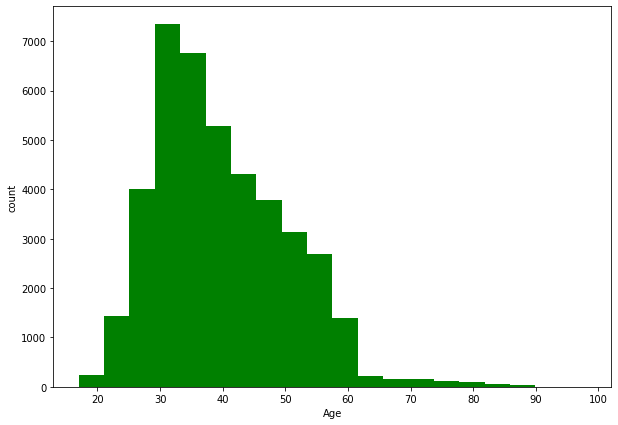

In [26]:
#Plotted graph on based on Age for number of count
plt.figure(figsize = (10, 7)) 
df1 = pd.read_csv('banking.csv')
x1 = df1.age 
y1 = df1.y
plt.hist(x1, bins = 20, color = "green") 
plt.xlabel("Age") 
plt.ylabel("count") 

Text(0, 0.5, 'count')

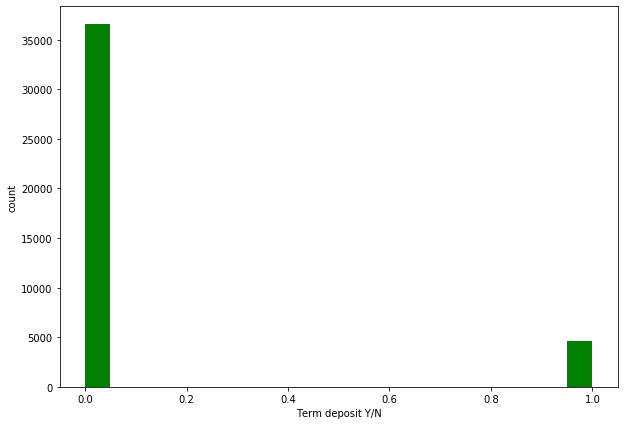

In [27]:
#Plotted graph on based on Term Deposit for Number of count
plt.figure(figsize = (10, 7)) 
y1 = df1.y
plt.hist(y1, bins = 20, color = "green") 
plt.xlabel("Term deposit Y/N") 
plt.ylabel("count") 

Text(0, 0.5, 'Term deposit')

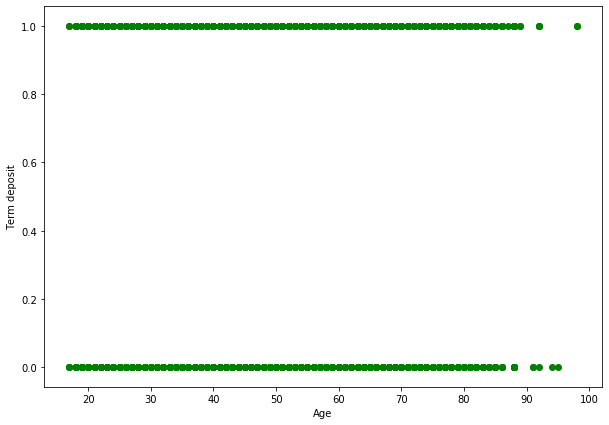

In [28]:
# Yes-1 No-0 (Y axis Term deopsit and X axis Age)
plt.figure(figsize = (10, 7)) 
df1 = pd.read_csv('banking.csv')
x1 = df1.age 
y1 = df1.y
plt.scatter(x1, y1, color = "green") 
plt.xlabel("Age") 
plt.ylabel("Term deposit") 

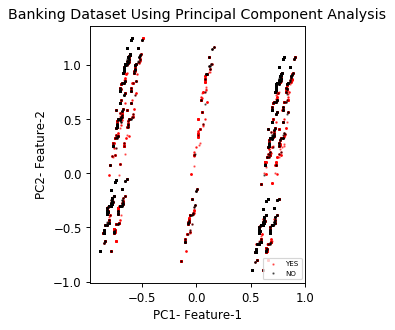

In [29]:
#Analysed using PCA, Combined all features into two axis and 
plt.figure(dpi=85)
plt.rc("font", size=10)
plt.scatter(pca[y.values == 0, 0], pca[y.values == 0, 1], alpha=0.5, label='YES', s=1, color='red')
plt.scatter(pca[y.values == 1, 0], pca[y.values == 1, 1], alpha=0.5, label='NO', s=1, color='black')
plt.legend(loc=4, prop={'size':6})
plt.title('Banking Dataset Using Principal Component Analysis')
plt.xlabel('PC1- Feature-1')
plt.ylabel('PC2- Feature-2')
plt.gca().set_aspect('equal')
plt.show()